![alt text](http://i63.tinypic.com/352kyeb.jpg)



# What are Features?

In computer vision and image processing, a feature is a piece of information which is relevant for solving the computational task related to a certain application.
 
There is no universal or exact definition of what constitutes a feature, and the exact definition often depends on the problem or the type of application. Given that, a feature is defined as an "interesting" part of an image, and features are used as a starting point for many computer vision algorithms.

Features maybe specific structures in the image such as points, edges or objects. Features may also be the result of a general neighbourhood operation or feature detection applied to the image.

Feature detection includes methods for computing abstractions of image information and making local decisions at every image point whether there is an image feature of a given type at that point or not. The resulting features will be subsets of the image domain, often in the form of isolated points, continuous curves or connected regions.

Feature detection is a low-level image processing operation. That is, it is usually performed as the first operation on an image, and examines every pixel to see if there is a feature present at that pixel. If this is part of a larger algorithm, then the algorithm will typically only examine the image in the region of the features. As a built-in pre-requisite to feature detection, the input image is usually smoothed by a Gaussian kernel in a scale-space representation and one or several feature images are computed, often expressed in terms of local image derivatives operations.

The feature concept is very general and the choice of features in a particular computer vision system may be highly dependent on the specific problem at hand.


---




# Basic Image Features

## Edges

Edges are points where there is a boundary (or an edge) between two image regions. In general, an edge can be of almost arbitrary shape, and may include junctions. In practice, edges are usually defined as sets of points in the image which have a strong gradient magnitude. Furthermore, some common algorithms will then chain high gradient points together to form a more complete description of an edge. These algorithms usually place some constraints on the properties of an edge, such as shape, smoothness, and gradient value.

Locally, edges have a one-dimensional structure.

## Corners/Interest Points

The terms corners and interest points are used somewhat interchangeably and refer to point-like features in an image, which have a local two dimensional structure. The name "Corner" arose since early algorithms first performed edge detection, and then analysed the edges to find rapid changes in direction (corners). These algorithms were then developed so that explicit edge detection was no longer required, for instance by looking for high levels of curvature in the image gradient. It was then noticed that the so-called corners were also being detected on parts of the image which were not corners in the traditional sense (for instance a small bright spot on a dark background may be detected). These points are frequently known as interest points, but the term "corner" is used by tradition.



---



# Image Gradients

One of the most basic and important convolutions is the computation of derivatives (or
approximations to them).  There are many ways to do this, but only a few are well suited
to a given situation. 

Let’s imagine we want to detect the edges present in the image. You can easily notice that in an edge, the pixel intensity changes in a notorious way. A good way to express changes is by using derivatives. A high change in gradient indicates a major change in the image. 

Let’s assume we have a 1D-image. An edge is shown by the “jump” in intensity as shown in the plot below:

![alt text](https://docs.opencv.org/2.4.13.4/_images/Sobel_Derivatives_Tutorial_Theory_Intensity_Function.jpg)

The edge “jump” can be seen more easily if we take the first derivative (actually, here it appears as a maximum)

![alt text](https://docs.opencv.org/2.4.13.4/_images/Sobel_Derivatives_Tutorial_Theory_dIntensity_Function.jpg)

So, from the explanation above, we can deduce that a method to detect edges in an image can be performed by locating pixel locations where the gradient is higher than its neighbors (or to generalize, higher than a threshold).

OpenCV provides three types of gradient filters or High-pass filters.

*   Sobel
*   Scharr
*   Laplacian

We will see each one of them.



---




# Sobel 

The Sobel Operator is a discrete differentiation operator. It computes an approximation of the gradient of an image intensity function.
The Sobel Operator combines Gaussian smoothing and differentiation.

Assuming that the image to be operated is I:

We calculate two derivatives:

**Horizontal changes**: This is computed by convolving I with a kernel of odd size as given below. For a kernel size of 3, $ G{x} $ would be computed as the convolution of the following matrix with I.

\begin{bmatrix}
-1 & 0 & +1  \\
-2 & 0 & +2  \\
-1 & 0 & +1
\end{bmatrix}

**Vertical changes**: This is computed by convolving I with a kernel of odd size as given below. For a kernel size of 3, $G{y}$ would be computed as the convolution of the following matrix with I.

\begin{bmatrix}
-1 & -2 & -1  \\
0 & 0 & 0  \\
+1 & +2 & +1
\end{bmatrix}

At each point of the image we calculate an approximation of the gradient at that point by combining both the results above:

$$ \begin{equation*} G = \sqrt{ G_{x}^{2} + G_{y}^{2} }\end{equation*} $$

Although sometimes the following simpler equation can also be used:

$$ \begin{equation*} G = |G{x}| + |G{y}| \end{equation*} $$



**Python**: 

```
cv2.Sobel(src, ddepth, xorder, yorder, ksize)
```



**Parameters:**

*   src – input image in grayscale.
*   ddepth –
output image depth; the following combinations of ddepth are supported:
    *  CV_8U
    *  CV_16U/CV_16S
    *  CV_32F
    *  CV_64F
*  xorder – order of the derivative x.
*  yorder – order of the derivative y.
*  ksize – size of the extended Sobel kernel; it must be 1, 3, 5, or 7.



---



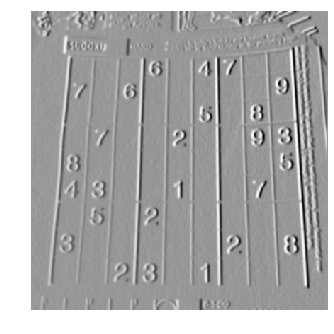

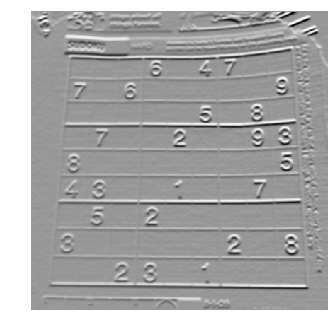

In [6]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('sudoku.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(img, (5, 5), 0)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.axis("off")
plt.imshow(sobelx)
plt.show()

plt.axis("off")
plt.imshow(sobely)
plt.show()

**Task-1:** The above program just takes the Sobel derivative and returns a grayscale image. Threshold the intensity values in the output image to return a binary image and hence implement a simple edge detector.

# Scharr

When the size of the kernel is 3, the Sobel kernel shown above may produce noticeable inaccuracies (after all, Sobel is only an approximation of the derivative). OpenCV addresses this inaccuracy for kernels of size 3 by using the Scharr function. This is as fast but more accurate than the standard Sobel function. It implements the following kernels:

**Horizontal changes**:  $G{x}$ would be computed as the convolution of the following matrix with I.

\begin{bmatrix}
-3 & 0 & +3  \\
-10 & 0 & +10  \\
-3 & 0 & +3
\end{bmatrix}

**Vertical changes**: $G{y}$ would be computed as the convolution of the following matrix with I.

\begin{bmatrix}
-3 & -10 & -3  \\
0 & 0 & 0  \\
+3 & +10 & +3
\end{bmatrix}

**Python**: 

```
cv2.Scharr(src, ddepth, xorder, yorder)
```



**Parameters:**

*   src – input image in grayscale.
*   ddepth –
output image depth; the following combinations of ddepth are supported:
    *  CV_8U
    *  CV_16U/CV_16S
    *  CV_32F
    *  CV_64F
*  xorder – order of the derivative x.
*  yorder – order of the derivative y.
---

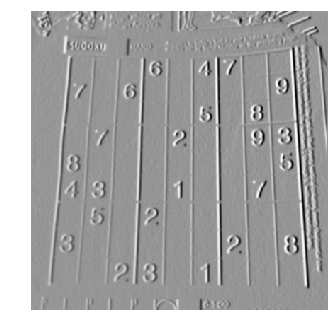

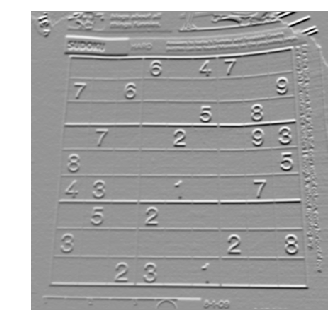

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sudoku.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(img, (5, 5), 0)
scharrx = cv2.Scharr(img,cv2.CV_64F,1,0)
scharry = cv2.Scharr(img,cv2.CV_64F,0,1)

plt.axis("off")
plt.imshow(scharrx)
plt.show()

plt.axis("off")
plt.imshow(scharry)
plt.show()

# Laplacian

In the previous section we learned how to use the Sobel Operator. It was based on the fact that in the edge area, the pixel intensity shows a sudden jump. By getting the first derivative of the intensity, we observed that an edge is characterized by a maximum, as it can be seen in the figure:

![alt text](https://docs.opencv.org/2.4.13.4/_images/Laplace_Operator_Tutorial_Theory_Previous.jpg)

What happens if we take the second derivative?

![alt text](https://docs.opencv.org/3.4/Laplace_Operator_Tutorial_Theory_ddIntensity.jpg)

You can observe that the second derivative is zero! So, we can also use this criterion to attempt to detect edges in an image. 

However, note that zeros will not only appear in edges, they can appear in other meaningless locations too due to noise. This can be easily solved by applying filters.

From the explanation above, we deduce that the second derivative can be used to detect edges. Since images are “2D”, we would need to take the derivative in both dimensions.

The Laplacian operator is defined by:
$$ \begin{equation*} Laplace(f) = \dfrac{\partial^{2} f}{\partial x^{2}} + \dfrac{\partial^{2} f}{\partial y^{2}} \end{equation*} $$

Since the Laplacian uses the gradient of images, it calls internally the Sobel operator to perform its computation.

But when ksize==1, the Laplacian is computed by convolving the image with the following 3X3 kernel, as double gradient for a ksize of 1 returns a zero everywhere.

\begin{bmatrix}
0 & 1 & 0  \\
1 & -4 & 1  \\
0 & 1 & 0
\end{bmatrix}

**Python**: 



```
cv2.Laplacian(src, ddepth)
```


**Parameters:**

*   src – input image in grayscale.
*   ddepth –
output image depth; the following combinations of ddepth are supported:
    *  CV_8U
    *  CV_16U/CV_16S
    *  CV_32F
    *  CV_64F
    
    
---

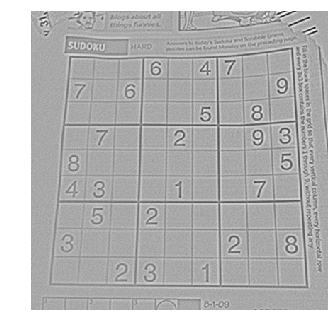

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sudoku.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(img, (5, 5), 0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)

plt.axis("off")
plt.imshow(laplacian)
plt.show()

**Task-2:** Threshold the intensity values in the output image to find zero-crossings of laplacian and hence implement a simple laplacian edge detector.

# Edge Detection

The general criteria for edge detection include:

*   **Low error rate**: This means that the detection should accurately catch as many edges in the image as possible.
*   **Good localization**: The edge point detected from the operator should accurately localize on the center of the edge.
*   **Minimal response**: A given edge in the image should only be marked once, and where possible, image noise should not create false edges.

There are many methods for edge detection, but most of them can be grouped into two categories:

*  **Search based methods**: These detect edges by first computing a measure of edge strength, usually the gradient magnitude, and then searching for local directional maximas of the gradient magnitude. 
*  **Zero-crossing based methods**: These search for zero crossings in a second-order derivative expression computed from the image, usually the zero-crossings of the Laplacian operator. 

As a pre-processing step to edge detection, a smoothing stage, typically **Gaussian smoothing**, is almost always applied for noise reduction.

The various edge detection methods that have been published mainly differ in the types of smoothing filters applied and the way the measures of edge strength are computed.

The most popular and widely implemented algorithm for edge detection in Computer Vision is the Canny Edge Detection.


---



# Canny Edge Detector

The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images. It was developed by John F. Canny in 1986.

The Process of Canny edge detection algorithm can be broken down to 5 different steps:

1.   Apply Gaussian filter to smooth the image in order to remove the noise
2.   Find the intensity gradients of the image.
3.   Apply non-maximum suppression to get rid of spurious response to edge detection.
4.   Apply double threshold to determine potential edges.
5.   Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges.


---



# 1) Gaussian filter

Since edge detection is susceptible to noise in the image, first step is to remove it with a 5x5 Gaussian filter. The Gaussian filter is applied to convolve with the image. This step will slightly smoothen the image to reduce the effects of obvious noise on the edge detector.

Given below is the 5×5 Gaussian filter generally used before implementing the Canny Edge Detection with a standard deviation of 1.4.

The asterisk below denotes a convolution operation.

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/efce20969e243d1ba3f34c2f7126041095bd4656)

**Note**: The gaussian filter won't be implicitly implemented on a call to the cv2.Canny() function. Hence, make sure that the image is filtered before passing it on to the Canny function.

---



# 2) Finding intensity gradient of the image

Smoothened image is then filtered with a Sobel kernel in both horizontal and vertical directions to get first derivative in horizontal direction ($G_x$) and vertical direction ($G_y$). From these two images, we can find edge gradient and direction for each pixel as follows:

![alt text](https://docs.opencv.org/3.0-beta/_images/math/a1d81c63db2a560ef2fc82222b7851257d1ef4a2.png)

The edge direction angle is then rounded to one of four angles representing vertical, horizontal and the two diagonals (0°, 45°, 90° and 135°). For instance θ in [0°, 22.5°] or [157.5°, 180°] is mapped to 0°.

After getting gradient magnitude and direction, a full scan of image is done to remove any unwanted pixels which may not constitute the edge. A threshold for the image gradients is set and only those pixels whose gradient magnitudes fall above this threshold are taken as edges.


---



# 3) Non-maximum suppression

Non-maximum suppression is an **edge thinning technique**. 
After applying gradient calculation, the edge extracted from the gradient value is still quite blurred. As minimal response is one of the important criterions for edge detection, there should only be one accurate response to the edge. Thus non-maximum suppression can help to suppress all the gradient values (by setting them to 0) except the local maxima, which indicate locations with the sharpest change of intensity value.

For this, every pixel is checked if it is a local maximum in the gradient direction.

The following algorithm is followed for each pixel in the gradient image.

*  Compare the edge strength of the current pixel with the edge strength of the pixel in the positive and negative gradient directions.
*  If the edge strength of the current pixel is the largest compared to both, the value will be preserved. Otherwise, the value will be suppressed.

It is by logic, we observe that the **gradient direction is always normal to the edge**.

![alt text](https://docs.opencv.org/3.0-beta/_images/nms.jpg)

Point A is on the edge (in vertical direction). Point B and C are in gradient directions. So point A is checked with point B and C to see if it forms a local maximum. If so, it is considered for next stage, otherwise, it is suppressed (put to zero).

*  If the rounded gradient angle is 0° (i.e. the edge is in the north-south direction), the point will be considered to be on the edge if its gradient magnitude is greater than the magnitudes at pixels in the east and west directions.
*  If the rounded gradient angle is 90° (i.e. the edge is in the east-west direction) the point will be considered to be on the edge if its gradient magnitude is greater than the magnitudes at pixels in the north and south directions.
*  If the rounded gradient angle is 135° (i.e. the edge is in the northeast-southwest direction) the point will be considered to be on the edge if its gradient magnitude is greater than the magnitudes at pixels in the north west and south-east directions.
*  If the rounded gradient angle is 45° (i.e. the edge is in the north west–south east direction) the point will be considered to be on the edge if its gradient magnitude is greater than the magnitudes at pixels in the north east and south west directions.

Note that the sign of the direction is irrelevant, i.e. north–south is the same as south–north and so on.

In short, the result you get is a binary image with “thin edges” as shown below.

![alt text](http://ai.stanford.edu/~syyeung/cvweb/Pictures1/canny2.png)


---



# 4) Double thresholding

After application of non-maximum suppression, remaining edge pixels provide a more accurate representation of real edges in an image. However, some edge pixels remain that are caused by noise and color variation. In order to account for these spurious responses, it is essential to filter out edge pixels with a weak gradient value and preserve edge pixels with a high gradient value. 

This is accomplished by selecting upper and lower threshold values. 

*  If the pixel gradient is higher than the upper threshold, it is marked as a strong edge pixel. 
*  If the pixel gradient is between the two thresholds, it is marked as a weak edge pixel. 
*  If the pixel gradient value is below the lower threshold, it will be suppressed. 

The two threshold values are passed on as arguments while calling the Canny Edge Detector function.

It is recommended that the upper:lower ratio is maintained between 2:1 and 3:1 for good results.


---



# 5) Hysteresis

The strong edge pixels obtained from the above thresholding are accepted as "true-edges".

The weak edge pixels obtained from the above thresholding are classified as edges or non-edges based on their connectivity. If they are somehow connected to a strong edge pixel moving along the edge, they are considered to be "true-edges". Otherwise, they are also discarded.

So what we finally get are only the strong edges in the image.

![alt text](http://ai.stanford.edu/~syyeung/cvweb/Pictures1/canny3.png)

**Note**: The input image passed on to the Canny function must be a grayscale image. The output image of the Canny function will be a Boolean (binary) grayscale image.

**Python**: 

```
cv2.Canny(src, minVal, maxVal, ksize, L2gradient)
```

**Parameters:**

*   src – input image in **grayscale**.
*   minVal – lower threshold value for double thresholding.
*   maxVal – upper threshold value for double thresholding.
*   ksize – size of the Sobel kernel for finding gradients; default ksize==3.
*   L2gradient – specifies the equation for finding gradient magnitude; default L2gradient==False.

If L2gradient is $True$, it uses $ \begin{equation*} G = \sqrt{ G_{x}^{2} + G_{y}^{2} }\end{equation*} $   for finding gradient magnitude.

If L2gradient is $False$, it uses $ \begin{equation*} G = |G{x}| + |G{y}| \end{equation*} $    for finding gradient magnitude.

---



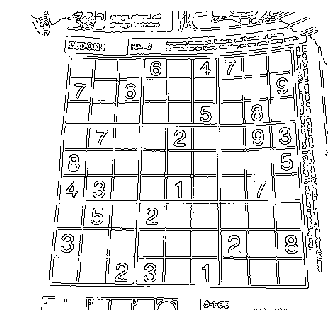

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('sudoku.jpg')
imggray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(imggray, (5, 5), 0)
canny = cv2.Canny(blurred,20,50)

plt.axis("off")
plt.imshow(canny)
plt.show()

**Optional Task-3:** Implement the Canny Edge Detection algorithm without using the cv2.Canny() function. In other words, try writing the function definition of the cv2.Canny() function.

**Optional Task-4:** Propose an algorithm to find the **corners** in an image by using image gradients and the Canny edge detector.

# **Corner Detection**

We already saw that corners are point-like features in an image, which have a local two dimensional structure. In other words, corners are regions in the image with large intensity variations in two perpendicular directions. Corners are generally invariant to translation, rotation and illumination.

The most widely implemented methods for corner detection in Computer Vision are the Harris and Shi-Tomasi algorithms.

Let's discuss the basic algorithm used in both the methods.

##Algorithm

Each pixel in the image is checked to see if a corner is present by considering how similar a patch centered on the pixel is to nearby, largely overlapping patches.

The 3 basic spaces in an image can be distinguished as follows:

*  If the pixel is in a flat region of uniform intensity, then the nearby patches will look similar. 
*  If the pixel is on an edge, then nearby patches in a direction perpendicular to the edge will look quite different, but nearby patches in a direction parallel to the edge will result only in a small change. 
*  If the pixel is on a corner/feature with variation in all directions, then none of the nearby patches will look similar.

![alt text](https://i.stack.imgur.com/k1CCY.png)

The similarity between adjacent patches is measured by taking the sum of squared differences (SSD) between the corresponding pixels of two patches. A lower number indicates more similarity.

Without loss of generality, we will assume that a grayscale 2-dimensional image is used. Let the intensity of the pixel at $(x,y)$ be given by $I(x,y)$. Consider taking two image patches; one centred around the pixel at $(x,y)$ and the other shifted from the first patch by $(u,v)$. The weighted sum of squared differences (SSD) between these two patches is given by:

$${\displaystyle E(u,v)=\sum _{x}\sum _{y}w(x,y)\,\left(I(x+u,y+v)-I(x,y)\right)^{2}}$$

$w(a,b)$ is a window function and is either gaussian or rectangular(equal weight for all pixels in the window). It gives weights to pixels underneath the window. The size of the window function must be given while calling the corner detector and must be odd.

In the above expression, $I(x+u,y+v)$ can be approximated by Taylor expansion. Let $I_x$ and $I_y$ be the image intensity gradients in the $x$ and $y$ directions respectively found using the Sobel operator. This produces the following approximation.

$$I(x+u,y+v)\approx I(x,y)+I_{x}(x,y)u+I_{y}(x,y)v$$

$$E(u,v) \approx \sum_x \sum_y w(x,y) \, \left( I_x(x,y)u + I_y(x,y)v \right)^2$$

This can be written in matrix form as follows:

$$E(u,v) \approx \begin{bmatrix} u & v \end{bmatrix} M \begin{bmatrix} u \\ v \end{bmatrix}$$

where, 

$$M = \sum_{x,y} w(x,y) \begin{bmatrix}I_x I_x & I_x I_y \\
                                     I_x I_y & I_y I_y \end{bmatrix}$$

From the Spectral theorem in linear algebra, we know that any symmetric matrix can be represented as follows

$$M=Q.D.Q^T$$

where Q is a rotation and D is a diagonal matrix of the eigen values $\lambda_1$ and $\lambda_2$ of the matrix M.

As $Q^T.\begin{bmatrix} u & v \end{bmatrix}^T=\begin{bmatrix} u' & v' \end{bmatrix}^T$ and $Q.\begin{bmatrix} u & v \end{bmatrix}=\begin{bmatrix} u' & v' \end{bmatrix}$, 

$$E(u,v) = \begin{bmatrix} u' & v' \end{bmatrix} D \begin{bmatrix} u' \\ v' \end{bmatrix}=\lambda_1(u')^2+\lambda_2(v')^2$$

Hence, $E(u,v)$ is large in both the directions u' and v' if both the eigen values $\lambda_1~ and ~\lambda_2$ are large.

The following inferences can be made based on this argument:

*  If $ \lambda_1 \approx 0$ and $\lambda_2 \approx 0$ then this pixel $(x,y)$ has no features of interest.
*  If $\lambda_1 \approx 0$ and $\lambda _{2}$ has some large positive value or vice-versa, then an edge is found.
*  If $\lambda_1$ and $\lambda_2$ both have large positive values, then a corner is found.

Hence, for detecting a Corner, both the eigen values must be large enough.Harris and Shi-Tomasi Corner Detectors maximize these eigen values in 2 different ways.

---



# Harris Corner Detector

The exact computation of the eigenvalues is computationally expensive, since it requires the computation of a square root while solving a quadratic equation. The Harris Corner Detector uses a score to maximize these eigen values without calculating them individually. 

As $ \lambda_1 $ and $ \lambda_2 $ are the eigen-values of $M$, we have the following properties.

$$ det(M) = \lambda_1\lambda_2 $$
$$ trace(M) = \lambda_1 + \lambda_2 $$

Let's define a score $R$ as follows:

$$ R = det(M)-k \ (trace(M))^2 $$

where k is an empirically determined constant between $0.04-0.06$.

*   When $|R|$ is small, which happens when $\lambda_1$ and $\lambda_2$ are small, the region is flat.
*  When $R\lt0$, which happens when $\lambda_1 \gt\gt \lambda_2$ or vice-versa, the region is an edge
*  When $R$ is large, which happens when $\lambda_1$ and $\lambda_2$ are large and $\lambda_1 \sim \lambda_2$, the region is a corner.

The image below illustrates this with $\lambda_1$ and $\lambda_2$ as axes.

![alt text](https://docs.opencv.org/3.0-beta/_images/harris_region.jpg)

The result of Harris Corner Detection is a grayscale image with this score as the intensity of that particular pixel. **Thresholding** for a suitable value of R gives the corners in the image.

**Python**: 

```
cv2.cornerHarris(img, blockSize, ksize, k)
```

**Parameters:**

*   img - Input image in grayscale.
*  blockSize - Size of neighbourhood patch or window size considered for corner detection.
*  ksize - Kernel size for taking the Sobel derivative.
*  k - Empirical constant to be used in the Harris detector; k should lie  between 0.04 and 0.06 for good results.


---



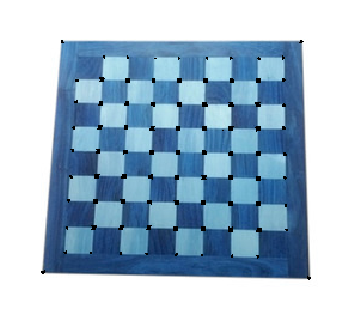

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('chess.jpg')
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ch = cv2.cornerHarris(img1,3,3,0.05)
img[ch>0.01*ch.max()]=[0,0,0] #Thresholding

plt.axis("off")
plt.imshow(img)
plt.show()

# Shi-Tomasi Corner Detector

The Shi-Tomasi Corner Detector uses a different score to find the corners. 

$$\begin{equation*} R = min(\lambda_1,\lambda_2) \end{equation*}$$

The value of this score is thresholded to find required corners in the image.

![alt text](https://docs.opencv.org/3.0-beta/_images/shitomasi_space.png)

From the figure, we can see that only when both $\lambda_1~ and ~\lambda_2$ are above a minimum value, $\lambda_{min}$, it is conidered as a corner(green region).

**Python**: 

```
cv2.goodFeaturesToTrack(img, maxCorners, qualityLevel, minDistance)
```
It finds N(maxCorners) strongest corners in the image by Shi-Tomasi method.

**Parameters:**

*  img - Input image in grayscale.
*  maxCorners – Maximum number of corners to return.
*  qualityLevel – A value between 0-1, which denotes the minimum quality of corner below which everything is rejected. This value is multiplied with the maximum value of R in the image to get the quality measure. Any corner with R less than this quality measure is rejected as a corner.
*  minDistance – Minimum possible Euclidean distance between the returned corners.

With all these information, the function finds corners in the image. All corners below quality measure are rejected. Then it sorts the remaining corners based on quality in the descending order. Then the function takes the most strongest corner, throws away all the nearby corners in the range of minimum distance and finally returns the N strongest corners in the image.



---






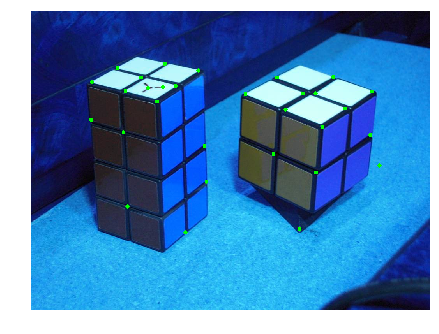

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('cube.jpg')
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(img1,30,0.01,30)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),5,(0,255,0),-1)

plt.axis("off")
plt.imshow(img)
plt.show()

# Morphological Transformations

Morphological operations are a set of operations that process images based on shapes. They apply a structuring element to an input image and generate an output image.

The most basic morphological operations are two: Erosion and Dilation.

# Erosion

**Basics of Erosion:**

*  Erodes away the boundaries of foreground object.
*  Used to diminish the features of an image.

**Working of erosion:**

*  A kernel of odd size (3, 5 or 7) is convolved with the image.
*  A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).
*  Thus all the pixels near boundary will be discarded depending upon the size of kernel.
*  So the thickness or size of the foreground object decreases or simply white region decreases in the image.

**Python**: 

```
cv2.erode(img, kernel, iterations)
```
**Parameters:**

*  img - Input image in **Binary**
*  kernel - The kernel used for erosion.
*  iterations - The number of times you want the convolution to happen. Multiple erosions can be combined into a single function using this argument. By default iterations = 1.


---



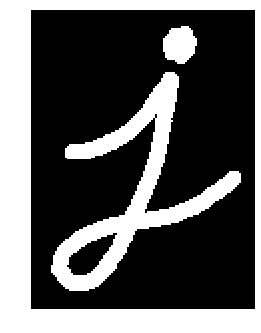

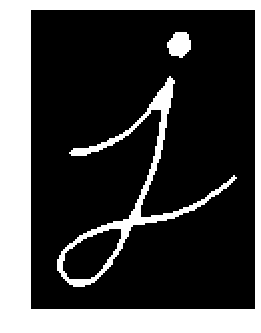

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('j.png')
kernel = np.ones((5,5))
erosion = cv2.erode(img, kernel, iterations = 1)

plt.axis("off")
plt.imshow(img)
plt.show()

plt.axis("off")
plt.imshow(erosion)
plt.show()

# Dilation

**Basics of dilation:**

*  Increases the object area.
*  Used to accentuate features.

**Working of dilation:**

*  A kernel of odd size (3, 5 or 7) is convolved with the image.
*  A pixel element in the original image is ‘1’ if atleast one pixel under the kernel is ‘1’.
*  It increases the white region in the image or in other words, the size of the foreground object increases.

**Python**: 

```
cv2.dilate(img, kernel, iterations)
```
**Parameters:**

*  img - Input image in **Binary**
*  kernel - The kernel used for dilation.
*  iterations - The number of times you want the convolution to happen. Multiple dilations can be combined into a single function using this argument. By default iterations = 1.


---



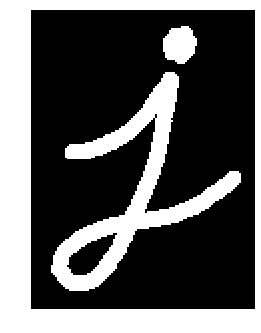

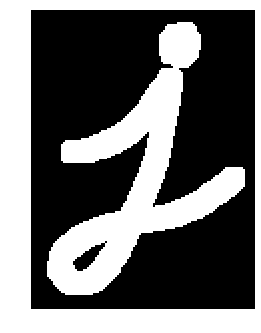

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('j.png')
kernel = np.ones((5,5))
erosion = cv2.dilate(img, kernel, iterations = 1)

plt.axis("off")
plt.imshow(img)
plt.show()

plt.axis("off")
plt.imshow(erosion)
plt.show()

# Other Morphological Transformations

## Opening

Opening is just erosion followed by dilation. It is useful in removing noise as seen in the image below.

![alt text](https://docs.opencv.org/3.0-beta/_images/opening.png)

## Closing

Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

![alt text](https://docs.opencv.org/3.0-beta/_images/closing.png)

## Morphological Gradient

It is just the difference between dilation and erosion of an image. The result will look like the outline of the object.

![alt text](https://docs.opencv.org/3.0-beta/_images/gradient.png)

## Top Hat

It is the difference between input image and opening of the image. Below example is done for a 9x9 kernel.

![alt text](https://docs.opencv.org/3.0-beta/_images/tophat.png)

## Black Hat

It is the difference between the closing of the input image and input image.

![alt text](https://docs.opencv.org/3.0-beta/_images/blackhat.png)

**Python**: 

```
cv2.morphologyEx(img, operation, kernel)
```
**Parameters:**

*  img - Input image in **Binary**
*  transform - The type of operation can take the following arguments:
  *  cv2.MORPH_OPEN to implement opening.
  *  cv2.MORPH_CLOSE to implement closing.
  *  cv2.MORPH_GRADIENT to implement morphological gradient.
  *  cv2.MORPH_TOPHAT to implement top hat.
  *  cv2.MORPH_BLACKHAT to implement black hat.
*  kernel - The kernel to be used for the transform.


---



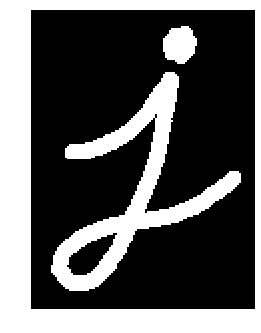

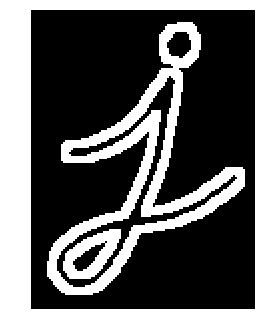

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('j.png')
kernel = np.ones((5,5))
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

plt.axis("off")
plt.imshow(img)
plt.show()

plt.axis("off")
plt.imshow(gradient)
plt.show()

# SIFT (Scale-Invariant Feature Transform)
 
In the previous sections, we saw the Harris and Shi-Tomasi Corner Detectors. They are rotation-invariant, which means, even if the image is rotated, we can find the same corners. It is obvious because corners remain corners in rotated image also. 

But what about scaling? A corner may not be a corner if the image is scaled. For example, check a simple image below. A corner in a small image within a small window is flat when it is zoomed in the same window. So Harris detector is not scale invariant.

![alt text](https://docs.opencv.org/3.0-beta/_images/sift_scale_invariant.jpg)

To overcome this problem, a SIFT algorithm was proposed. There are mainly five steps involved in SIFT algorithm. We will see them one-by-one.
 
 

## 1. Scale-space Extrema Detection

Laplacian of Gaussian is found for the image with various $\sigma$ values. LoG acts as a blob detector which detects blobs in various sizes due to change in $\sigma$. In short, $\sigma$ acts as a scaling parameter. For eg, in the above image, gaussian kernel with low $\sigma$ gives high value for small corner while guassian kernel with high $\sigma$ fits well for larger corner. So, we can find the local maxima across the scale and space which gives us a list of (x,y,$\sigma$) values which means there is a potential keypoint at (x,y) at $\sigma$ scale.

But this LoG is a little costly, so SIFT algorithm uses Difference of Gaussians which is an approximation of LoG. Difference of Gaussian is obtained as the difference of Gaussian blurring of an image with two different $\sigma$, let it be $\sigma$ and k$\sigma$. This process is done for different octaves of the image in Gaussian Pyramid. It is represented in below image:

![alt text](https://docs.opencv.org/3.0-beta/_images/sift_dog.jpg)

Once this DoG are found, images are searched for local extrema over scale and space. For eg, one pixel in an image is compared with its 8 neighbours as well as 9 pixels in next scale and 9 pixels in previous scales. If it is a local extrema, it is a potential keypoint. It basically means that keypoint is best represented in that scale. It is shown in below image:

![alt text](https://docs.opencv.org/3.0-beta/_images/sift_local_extrema.jpg)

Regarding different parameters, the paper gives some empirical data which can be summarized as, number of octaves = 4, number of scale levels = 5, initial $\sigma$=1.6, k=$\sqrt{2}$ etc as optimal values.


## 2. Keypoint Localization

Once potential keypoints locations are found, they have to be refined to get more accurate results. They used Taylor series expansion of scale space to get more accurate location of extrema, and if the intensity at this extrema is less than a threshold value (0.03 as per the paper), it is rejected. This threshold is called contrastThreshold in OpenCV

DoG has higher response for edges, so edges also need to be removed. For this, a concept similar to Harris corner detector is used. They used a 2x2 Hessian matrix (H) to compute the pricipal curvature. We know from Harris corner detector that for edges, one eigen value is larger than the other. So here they used a simple function,

If this ratio is greater than a threshold, called edgeThreshold in OpenCV, that keypoint is discarded.

So it eliminates any low-contrast keypoints and edge keypoints and what remains is strong interest points.



## 3. Orientation Assignment

Now an orientation is assigned to each keypoint to achieve invariance to image rotation. A neigbourhood is taken around the keypoint location depending on the scale, and the gradient magnitude and direction is calculated in that region. An orientation histogram with 36 bins covering 360 degrees is created. (It is weighted by gradient magnitude and gaussian-weighted circular window with $\sigma$ equal to 1.5 times the scale of keypoint. The highest peak in the histogram is taken and any peak above 80% of it is also considered to calculate the orientation. It creates keypoints with same location and scale, but different directions. It contribute to stability of matching.

## 4. Keypoint Descriptor

Now keypoint descriptor is created. A 16x16 neighbourhood around the keypoint is taken. It is devided into 16 sub-blocks of 4x4 size. For each sub-block, 8 bin orientation histogram is created. So a total of 128 bin values are available. It is represented as a vector to form keypoint descriptor. In addition to this, several measures are taken to achieve robustness against illumination changes, rotation etc.

## 5. Keypoint Matching
Keypoints between two images are matched by identifying their nearest neighbours. But in some cases, the second closest-match may be very near to the first. It may happen due to noise or some other reasons. In that case, ratio of closest-distance to second-closest distance is taken. If it is greater than 0.8, they are rejected. It eliminaters around 90% of false matches while discards only 5% correct matches.



## Implementation


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
  
img = cv2.imread('cube.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)
img=cv2.drawKeypoints(gray,kp,img)

plt.axis("off")
plt.imshow(img)
plt.show()

In [0]:
img=cv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('sift_keypoints.jpg',img)

In [0]:
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(gray,None)

# $$THE~END!$$